MNIST 해보기

숫자 필기체 인식하기

입력층 28 * 28 크기를 가지는 2차원 이미지 데이터를 1차원 벡터로 변환해야한다.

즉, 입력층에서는 Flatten() 함수를 이용해서 784개(28*28)의 길이를 갖는 1차원 벡터로 변환해서 은닉층으로 전달한다.

은닉층의 총 개수와 노드 개수가 전형적 하이퍼 파라미터이다. 스스로 최적의 값을 찾아보자.

출력층의 노드 개수는 정답(label)의 범주와 같은 x(10)(0 ~ 9개로 설정합니다. 총 10개 가운데 하나의 숫자로 표현되가 때문에 출력 층 노드 개수 또한 정답 개수와 동일한 10개라는 것을 반드시 기억해야합니다.

**학습 데이터가 이미지여서 데이터 전처리가 필요!!!**

정규화와 원핫 인코딩과 같은 데이터 전처리 필요

정규화: MinMax(), 표준화 알고리즘

원핫인코딩: to_categorical() API 사용

정규화란

모든 데이터의 범위를 0 ~ 1 사이의 값으로 변환시키는 과정

**data(new) =  (data - Min)/(Max - Min)**

표준화란

딥러닝 모델이 더 높은 정확도를 가질수 있도록 평균과 표준편차를 이용하여 **특정범위를 벗어나는 데이터는 outlier로 간주하여 제거하는 과정**

**data(new) = (data** - **Mean**(*평균*))**/ std**(*표준편차*)

원핫 인코딩이란

1. **정답 개수와 동일한 크기를 가지는 리스트 생성**

2. **정답에 해당하는 리스트의 인덱스의 값에는 1**, **나머지는 0을 넣어서 정답을 표현하는 방식**

즉 리스트에서 가장 큰 값을 가지는 인덱스를 정답으로 인식

모델 컴파일

정답이 원핫이라면 loss = 'categorical_crossentropy'

아니라면 loss =  'sparse_categorical_crossentropy'

In [ ]:
# 임포트

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
# 데이터 확인

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print("train x shape: ", x_train.shape)
print("train label shape: ", t_train.shape)
print("test x shape: ", x_test.shape)
print('test label shape: ', t_test.shape)

train x shape:  (60000, 28, 28)
train label shape:  (60000,)
test x shape:  (10000, 28, 28)
test label shape:  (10000,)


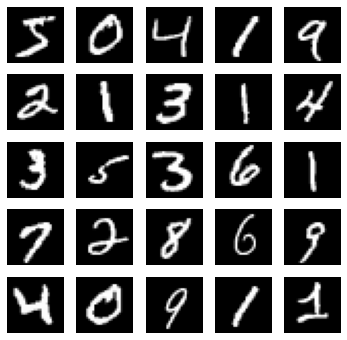

In [ ]:
# 데이터 이미지 출력
plt.figure(figsize=(6,6))

# 25개의 이미지만 예시 출력
for i in range(25):
  plt.subplot(5,5,i+1)  # 5행 5열
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
# 정규화, 원핫 인코딩

# 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)       # data(new) = (data - min) / (max - min) 픽셀 값의 범위가 0 ~ 255여서 최소 0, 최대 255임!!!
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫인코딩
# 0~9로 총 9개의 분류가 존재
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [ ]:
# 모델 구축 및 컴파일

model = tf.keras.Sequential()
# 입력층 Flatten을 통해서 28*28크기의 2차원 이미지를 784(28*28)개의 1차원 벡터로 변환
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# 은닉층 노드 100개는 스스로 정한것
model.add(tf.keras.layers.Dense(70, activation='relu'))
# 출력층 10은 분류(정답)의 개수인 10으로
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss= 'categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 70)                54950     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                710       
Total params: 55,660
Trainable params: 55,660
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습

# 오버피팅 확인을 위해 validation_split
# 훈련 데이터중 0.3의 비율로 validation data 생성 후 오버피팅 확인하는것
hist = model.fit(x_train, 
                 t_train, 
                 epochs=30, 
                 validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5659 - accuracy: 0.8411 - val_loss: 0.2122 - val_accuracy: 0.9374
Epoch 2/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1686 - accuracy: 0.9503 - val_loss: 0.1538 - val_accuracy: 0.9550
Epoch 3/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1188 - accuracy: 0.9647 - val_loss: 0.1362 - val_accuracy: 0.9589
Epoch 4/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0931 - accuracy: 0.9728 - val_loss: 0.1133 - val_accuracy: 0.9670
Epoch 5/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0725 - accuracy: 0.9789 - val_loss: 0.1151 - val_accuracy: 0.9676
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.1170 - val_accuracy: 0.9669
Epoch 7/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0492 - accuracy: 0.9861 - val_loss: 0.1080 - val_accuracy:

In [ ]:
# 모델 정확도 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1344 - accuracy: 0.9749


[0.13438458740711212, 0.9749000072479248]

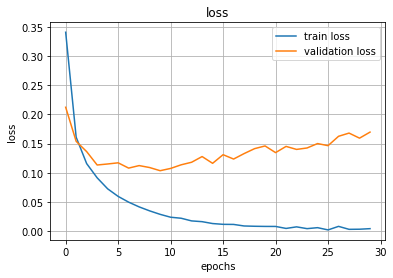

In [ ]:
# 손실

plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')
plt.show()

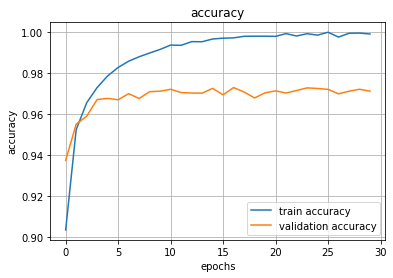

In [ ]:
# 정확도

plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')
plt.show()

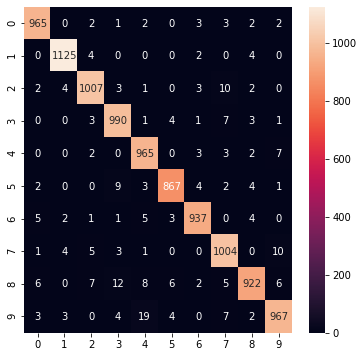

In [10]:
# 혼동 행렬
# 각 이미지에 대한 정확도
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
pred_val = model.predict(x_test)
cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(pred_val, axis=-1))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()